In [1]:
import numpy as np
import ot #package for optimal transport solver
import scipy.stats as st
import matplotlib.pyplot as plt
from helper import *

### Plots supporting the fact that f_n converges to b_n

In [3]:
def ecdf(x):
    x = np.sort(x)
    def result(v):
        return np.searchsorted(x, v, side='right') / x.size
    return result

In [4]:
def b_n(n, seed):
    
    np.random.seed(seed) #setting seed for reproducibility
    X=np.random.uniform(size=n)
    
    cdf=ecdf(X)
    
    x=np.linspace(0,1,n+2)
    
    return np.sqrt(n)*(cdf(x)-x)

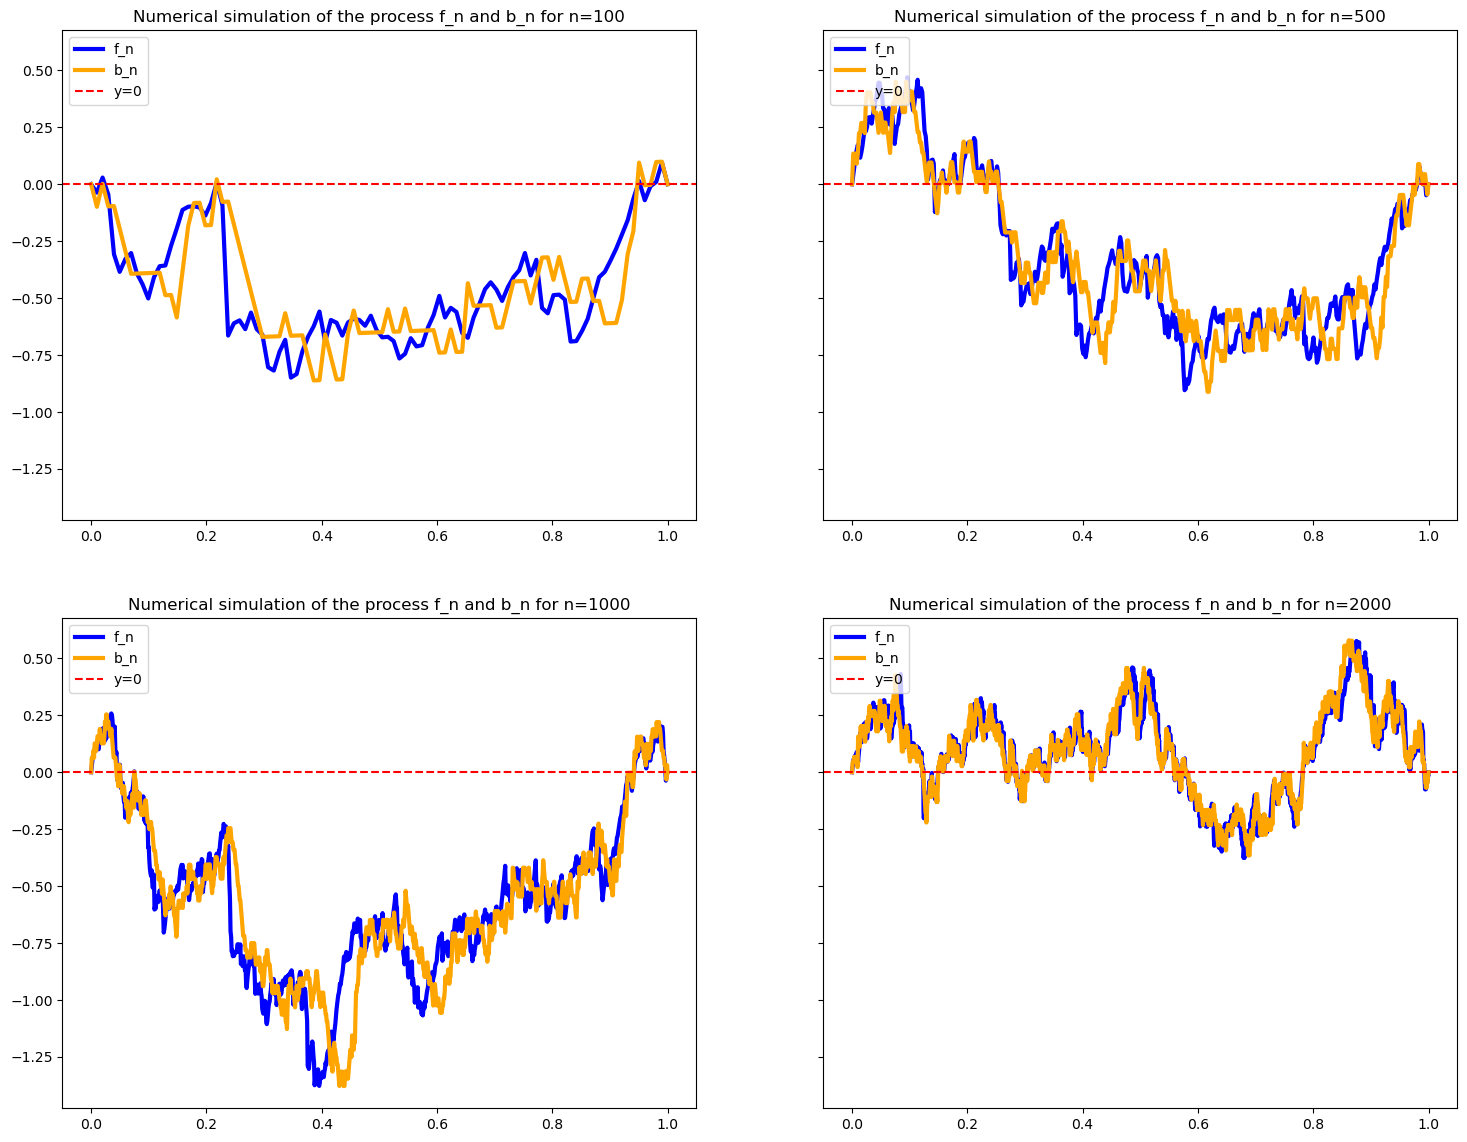

In [18]:
seed=9001

fig, ax = plt.subplots(2,2,figsize= (18,14), sharey = True, sharex = False)

for i, n in enumerate([100, 500, 1000, 2000]):
    sbplt = ax[int((i-i%2)/2), int(i%2)]
    x=np.linspace(0,1,n+2)
    sbplt.plot(x, f_n(n,seed), linewidth=3, color="blue", label="f_n")
    sbplt.plot(x, b_n(n, seed), linewidth=3, color="orange", label="b_n")
    sbplt.axhline(y=0, color='r', linestyle='--', label="y=0")
    sbplt.legend(loc='upper left')
    sbplt.set_title("Numerical simulation of the process f_n and b_n for n={}".format(n))
    
    #to save the figures separatly
    extent = sbplt.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    sbplt.figure.savefig("Figures/fn_b_n_"+str(n) +".png", bbox_inches=extent.expanded(1.21, 1.21))

    

### Plots giving insight in the distribution of a uniform random vector

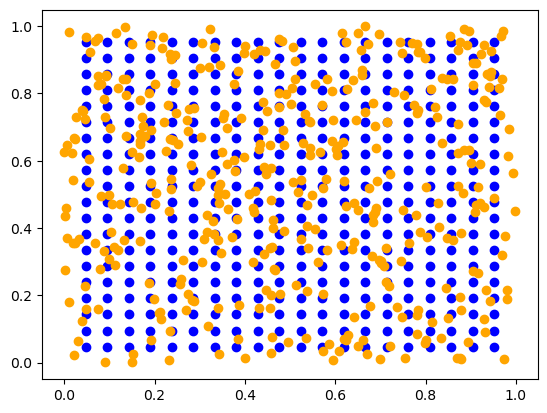

In [41]:
seed=9001
np.random.seed(seed)

n=20

X=np.random.uniform(size=(n**2,2))

x_values = np.linspace(1,n,n)/(n+1)
y_values = np.linspace(1,n,n)/(n+1)

X_coord, Y_coord = np.meshgrid(x_values, y_values) #describes a grid where (X_coord[i][j], Y_coord[i][j]) described the meshed points 

plt.scatter(X_coord, Y_coord, color="blue")
plt.scatter(X[:,0], X[:,1], color="orange")

plt.savefig('Figures/uniform_distribution_dim_2.png')

plt.show()

In [32]:
X_grid=np.array([[X_coord[i][j], Y_coord[i][j]] for j in range(n) for i in range(n)])

C=np.zeros((n**2,n**2))#cost matrix, C_ij is the distance between X_i and Y_j, of size n**2 times n**2

for i in range(n**2):
    for j in range(n**2):
        C[i,j]=np.linalg.norm(X[i]-X_grid[j])**2
        
a=np.ones(n**2)/n**2
b=np.ones(n**2)/n**2
P_test=ot.emd(a, b, C, numItermax=100000, log=False, center_dual=True, numThreads=1, check_marginals=True)
    
X_p=np.zeros((n**2,2))

for i in range(n**2):
    index=np.argwhere(P_test[i,:]>0)
    
    X_p[index[0,0]]=X[i]

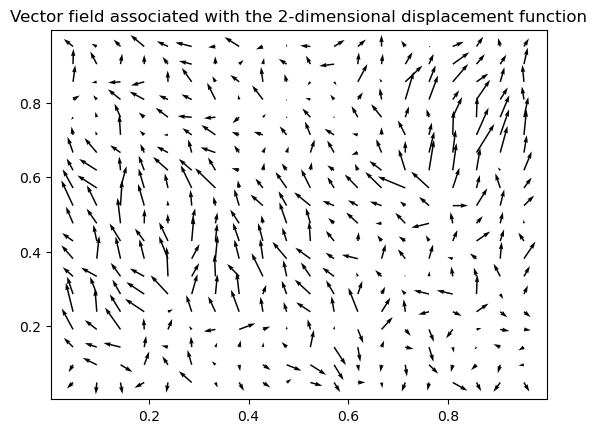

In [40]:
plt.quiver(X_grid[:,0], X_grid[:,1], X_p[:,0]-X_grid[:,0], X_p[:,1]-X_grid[:,1])
plt.title("Vector field associated with the 2-dimensional displacement function")

plt.savefig('Figures/f_n_vector_field.png')